# Curve Sketching – Local Maxima, Minima & Inflection Points

This notebook demonstrates **Curve Sketching** techniques  
using a classic example function:

$
f(x) = x^3 - 3x
$

---

## What is Curve Sketching?

Curve Sketching is about analysing the **local behaviour** of a function  
by using its first and second derivatives:

- The **first derivative** $f'(x)$ tells us where the function is increasing or decreasing,  
  and helps locate **critical points** (potential local maxima or minima).

- The **second derivative** $f''(x)$ tells us about **concavity**:  
  where the curve is concave up or concave down, and where it changes concavity (**inflection points**).

---

## What do we do in this notebook?

-  Use **`sympy`** to:
  - Derive the symbolic first and second derivatives.
  - Solve $f'(x) = 0$ to find critical points.
  - Solve $f''(x) = 0$ to find inflection points.

-  Use **`numpy`** to:
  - Compute numerical values of the function and its derivatives on a defined interval.

-  Use **`matplotlib`** to:
  - Plot the function $f(x)$.
  - Mark the local maxima, minima, and inflection points.
  - Visually verify how the signs of the derivatives match the curve shape.

---

## Requirements

- `numpy`
- `sympy`
- `matplotlib`

---

## Goal

By the end of this notebook you should:
- Be able to locate and interpret local maxima, minima, and inflection points.
- Understand how the first and second derivatives describe local curve behaviour.
- Be able to verify symbolic results, numerical calculations, and graph interpretation together.


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.Symbol('x')
f = x**3-3*x
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)

print("f(x) =", f)
print("f'(x) =", f_prime)
print("f''(x) =", f_double_prime)

f(x) = x**3 - 3*x
f'(x) = 3*x**2 - 3
f''(x) = 6*x


In [3]:
critical_points = sp.solve(f_prime, x)
print("Critical points (f'(x)=0):", critical_points)

inflection_points = sp.solve(f_double_prime, x)
print("Inflection points (f''(x)=0):", inflection_points)

Critical points (f'(x)=0): [-1, 1]
Inflection points (f''(x)=0): [0]


In [4]:
f_func = sp.lambdify(x, f, modules=['numpy'])
f_prime_func = sp.lambdify(x, f_prime, modules=['numpy'])
f_double_prime_func = sp.lambdify(x, f_double_prime, modules=['numpy'])

x_vals = np.linspace(-3, 3, 400)
y_vals = f_func(x_vals)
y_prime_vals = f_prime_func(x_vals)
y_double_prime_vals = f_double_prime_func(x_vals)

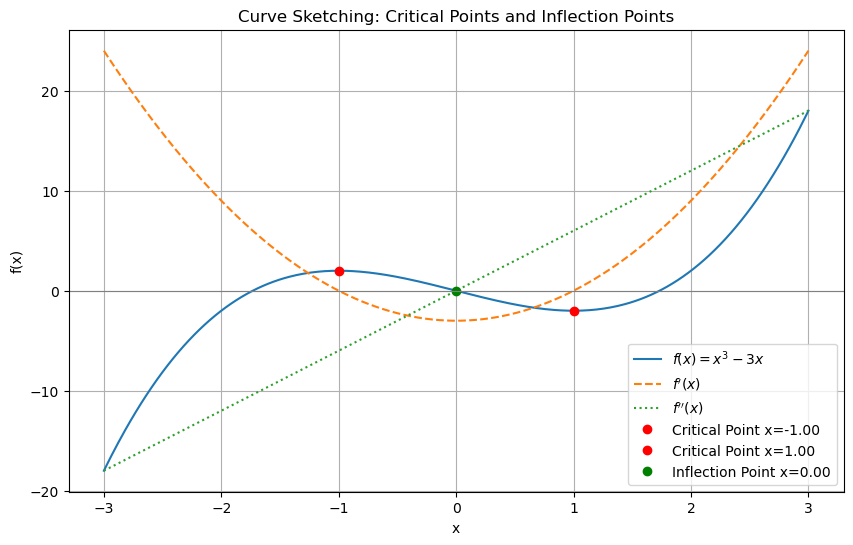

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x)=x^3 - 3x$')
plt.plot(x_vals, y_prime_vals, label=r"$f'(x)$", linestyle='--')
plt.plot(x_vals, y_double_prime_vals, label=r"$f''(x)$", linestyle=':')


for cp in critical_points:
    cp_val = float(cp)
    plt.plot(cp_val, f_func(cp_val), 'ro', label=f'Critical Point x={cp_val:.2f}')

for ip in inflection_points:
    ip_val = float(ip)
    plt.plot(ip_val, f_func(ip_val), 'go', label=f'Inflection Point x={ip_val:.2f}')

plt.axhline(0, color='gray', linewidth=0.8)

plt.title('Curve Sketching: Critical Points and Inflection Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation: What to Check after Plotting

After plotting the original function **together with its first and second derivatives**, check the following points to confirm your curve sketching analysis is correct:

---

### 1️. Zero Crossings of the First Derivative  
- The points where **f'(x)** crosses zero should match the **local maximum or minimum** points of **f(x)**.
- This confirms the slope of the curve is zero at those points.

---

### 2️⃣ Sign of the First Derivative  
- Where **f'(x) > 0**, the original function should be **increasing**.
- Where **f'(x) < 0**, the original function should be **decreasing**.
- This verifies that the local monotonic behavior matches the symbolic result.

---

### 3️⃣ Zero Crossings of the Second Derivative  
- The points where **f''(x)** crosses zero should match the **inflection points** of **f(x)**.
- This indicates that the curve’s concavity changes at those x-values.

---

### 4️⃣ Sign of the Second Derivative  
- Where **f''(x) > 0**, the curve should be **concave up** (holds water).
- Where **f''(x) < 0**, the curve should be **concave down** (sheds water).
- This shows that the local curvature behavior is consistent with the symbolic calculation.

---

### 5️⃣ Smoothness & Continuity  
- Both the function and its derivatives should be smooth and continuous if the function is differentiable everywhere.
- Any unexpected jumps, breaks, or rough corners may signal a mistake in the symbolic expression or numeric approximation.

---

## ✅ Final Check  
If all these conditions hold:
- Your symbolic derivation is correct.
- The numerical results match the expected local behavior.
- The visualization shows how the derivatives explain the local shape of the curve.

**Key takeaway:**  
Combining symbolic derivatives, numerical values, and graphical plots helps you understand not just where special points occur but *why* they shape the curve’s behavior.
